In [1]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))
sys.path.append(os.path.join(os.getcwd(), '..', '..'))

In [36]:
%matplotlib inline

from session.sessions import selected_009266
from imports import *
from matplotlib.patches import ConnectionPatch
from scipy.stats import pearsonr
from scipy import signal
from target import build_tgt_matrix
from loading import load_session_data
import functools

np.set_printoptions(suppress=True)

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
selected_009266

['009266_hippoSIT_2023-04-17_17-04-17',
 '009266_hippoSIT_2023-04-18_10-10-37',
 '009266_hippoSIT_2023-04-18_17-03-10',
 '009266_hippoSIT_2023-04-19_10-33-51',
 '009266_hippoSIT_2023-04-20_08-57-39',
 '009266_hippoSIT_2023-04-20_15-24-14',
 '009266_hippoSIT_2023-04-21_08-43-00',
 '009266_hippoSIT_2023-04-21_13-12-31',
 '009266_hippoSIT_2023-04-24_10-08-11',
 '009266_hippoSIT_2023-04-24_16-56-55',
 '009266_hippoSIT_2023-04-26_08-20-17',
 '009266_hippoSIT_2023-05-02_12-22-14',
 '009266_hippoSIT_2023-05-04_09-11-06',
 '009266_hippoSIT_2023-05-04_19-47-15',
 '009266_hippoSIT_2023-05-22_09-27-22',
 '009266_hippoSIT_2023-05-23_09-18-05',
 '009266_hippoSIT_2023-05-25_15-55-57',
 '009266_hippoSIT_2023-06-14_08-21-23',
 '009266_hippoSIT_2023-06-19_08-58-35']

In [5]:
session = selected_009266[4]

session_data = load_session_data(session)

tl = session_data['tl']
trials = session_data['trials']
cfg = session_data['cfg']
areas = session_data['areas']
aeps = session_data['aeps']
aeps_events = session_data['aeps_events']
lfp = session_data['lfp']
AEP_metrics_lims = session_data['AEP_metrics_lims']
AEP_metrics_raw = session_data['AEP_metrics_raw']
AEP_metrics_norm = session_data['AEP_metrics_norm']
tgt_matrix = session_data['tgt_matrix']
single_units = session_data['single_units']
spike_times = session_data['spike_times']
unit_names = session_data['unit_names']
animal = session_data['animal']
aeps_file = session_data['aeps_file']
h5_file = session_data['h5_file']
report_path = session_data['report_path']
session

'009266_hippoSIT_2023-04-20_08-57-39'

## Plot signal

In [57]:
area = 'PPC'
s_rate = 1000  # Hz

sig = lfp[area]

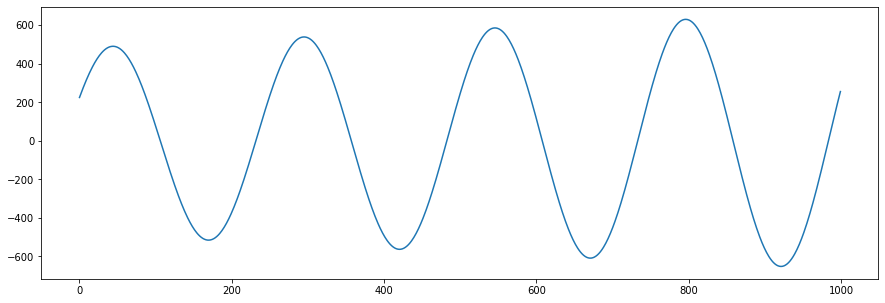

In [66]:
# sample of the signal
fig , ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(sig[2000:3000])

## Power spectrum

In [58]:
def get_power_spectrum(sig, s_rate=1000):
    FFT = np.fft.fft(sig)
    nyquist = s_rate / 2
    freqs = np.linspace(0, nyquist, int(len(sig)/2))
    half_FFT = FFT[:len(freqs)]
    complex_conjugate = np.conj(half_FFT)
    return freqs, half_FFT*complex_conjugate

In [59]:
def get_spectrum(sig, t_start, t_end, s_rate=1000, nperseg=1000):
    # nperseg - Number of samples per segment
    t_start_idx = int(t_start * s_rate)
    t_end_idx   = int(t_end * s_rate)

    noverlap = nperseg // 2  # Overlap between segments
    window = signal.hann(nperseg)  # Window function (Hann)
    frequencies, times, Sxx = signal.spectrogram(sig[t_start_idx:t_end_idx], s_rate, window=window, nperseg=nperseg, noverlap=noverlap)

    specgram = 10 * np.log10(Sxx)  # go to log scale
    specgram[specgram < 0] = 0  # remove very low powers
    return times, frequencies, specgram

In [71]:
# selected periods
unit = '3-15'
s_rate_coeff = 10  # timeline to LFP sampling diff.

i_rate = single_units[unit]
idxs_high = np.where(i_rate > i_rate.mean())[0]
idxs_low  = np.where(i_rate < i_rate.mean())[0]
idxs_bgr  = np.where(tl[:, 6] == 1)[0]
idxs_high_bgr = np.intersect1d(idxs_high, idxs_bgr)
idxs_low_bgr  = np.intersect1d(idxs_low, idxs_bgr)

def get_periods(idxs):
    diffs  = np.where(np.diff(idxs) > 1)[0]
    starts = np.concatenate([np.array([0]), diffs + 1])
    ends   = np.concatenate([diffs, np.array([len(idxs) - 1])])
    return np.column_stack([starts, ends]) * s_rate_coeff

sig = lfp[area]
sig = sigs['PPC']

sig_high = np.concatenate([sig[per[0]:per[1]] for per in get_periods(idxs_high_bgr)])
sig_low  = np.concatenate([sig[per[0]:per[1]] for per in get_periods(idxs_low_bgr)])
sig_high.shape, sig_low.shape
#result = functools.map(np.concatenate, [sig[per[0]:per[1]] for per in idxs_periods])

((560300,), (796410,))

/home/sobolev/projects/pySIT/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/sobolev/projects/pySIT/lib/python3.8/site-packages/matplotlib/transforms.py:2837: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])
/home/sobolev/projects/pySIT/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/sobolev/projects/pySIT/lib/python3.8/site-packages/matplotlib/transforms.py:2837: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


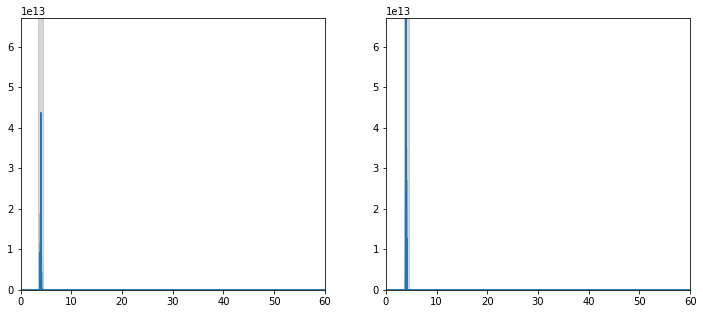

In [72]:
freqs_high, powers_high = get_power_spectrum(sig_high, s_rate=1000)
freqs_low, powers_low   = get_power_spectrum(sig_low, s_rate=1000)
d_max = np.max([powers_high.max(), powers_low.max()])

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].plot(freqs_high, powers_high)
axes[0].set_xlim(0, 60)
axes[0].set_ylim(0, d_max)
axes[0].axvspan(3.5, 4.5, alpha=0.3, color='gray')
axes[1].plot(freqs_low, powers_low)
axes[1].set_xlim(0, 60)
axes[1].set_ylim(0, d_max)
axes[1].axvspan(3.5, 4.5, alpha=0.3, color='gray')

In [56]:
from scipy.io import savemat

savemat(os.path.join(report_path, 'andrey.mat'), lfp)

## Spectrogram - selected period

In [167]:
t_start, t_end = 1000, 1100  # in seconds

# spectrogram
times, frequencies, specgram = get_spectrum(sig, t_start, t_end)

# speed
speed = tl[(tl[:, 0] > t_start) & (tl[:, 0] < t_end)][:, 3]

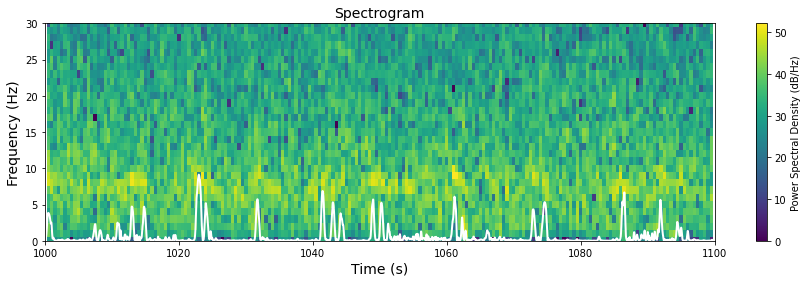

In [168]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
im = ax.pcolormesh(t_start + times, frequencies, specgram, shading='auto')
ax.plot(np.linspace(t_start, t_end, len(speed)), speed*10, color='white', lw=2)
#ax.plot(times, SxxM.sum(axis=0)/15, color='white')
ax.set_xlabel('Time (s)', fontsize=14)
ax.set_ylabel('Frequency (Hz)', fontsize=14)
ax.set_title('Spectrogram', fontsize=14)
ax.set_xlim(t_start, t_end)
ax.set_ylim(0, 30)
fig.colorbar(im, label='Power Spectral Density (dB/Hz)')

## Power spectrum for diff areas in time

### First filter the LFP in 4Hz

In [64]:
areas = ['A1', 'PPC']

In [65]:
# filter 4Hz
low_cut  = 3.9  # Hz
high_cut = 4.1 # Hz

sigs = {}
sos = signal.butter(10, [low_cut / (0.5*s_rate), high_cut/(0.5*s_rate)], analog=False, btype='band', output='sos')
sigs['A1']  = signal.sosfiltfilt(sos, lfp['A1'])
sigs['PPC'] = signal.sosfiltfilt(sos, lfp['PPC'])

# get power spectrum
spectrum = {'A1': {'freq': None, 'power': None}, 'PPC': {'freq': None, 'power': None}}
spectrum['A1']['freq'], spectrum['A1']['power']   = get_power_spectrum(sigs['A1'], s_rate=1000)
spectrum['PPC']['freq'], spectrum['PPC']['power'] = get_power_spectrum(sigs['PPC'], s_rate=1000)

/home/sobolev/projects/pySIT/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/sobolev/projects/pySIT/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


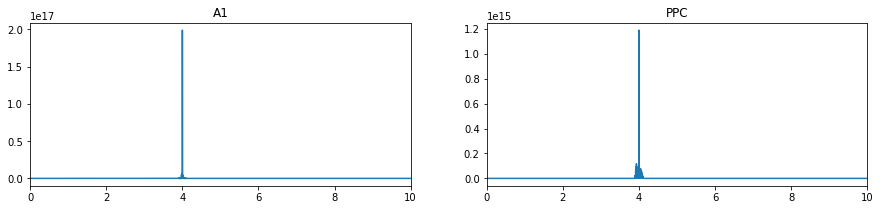

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(15, 3))
for i, area in enumerate(areas):
    axes[i].plot(spectrum[area]['freq'], spectrum[area]['power'])
    axes[i].set_xlim(0, 10)
    axes[i].set_title(areas[i])

In [39]:
# hilbert
hilbert = {}
for area in areas:
    hilbert[area] = {}
    a_signal = signal.hilbert(sigs[area])     # hilbert transform
    hilbert[area]['envelope'] = np.abs(a_signal)    # amplitude envelope
    hilbert[area]['phase']    = np.angle(a_signal) # instantaneous phase

# compute spectrograms
#times, frequencies, sgram_A1  = get_spectrum(sig_filt_A1, tl[0][0], tl[-1][0], nperseg=2*s_rate)
#times, frequencies, sgram_PPC = get_spectrum(sig_filt_PPC, tl[0][0], tl[-1][0], nperseg=2*s_rate)

### Plot the timeline

In [ ]:
window_l = 10  # in AEP events, 10 sec is ~40 events

def get_time_corrs(metrics1, metrics2):
    time_corrs = {}
    for metric in ['P1', 'N1', 'P3']:
        inst_corrs = np.zeros(len(metrics1[metric]) - window_l)
        metric1 = metrics1[metric]
        metric2 = metrics2[metric]
        for i in range(len(inst_corrs)):
            inst_corrs[i] = stats.pearsonr(metric1[i:i + window_l], metric2[i:i + window_l])[0]

        time_corrs[metric] = np.array(inst_corrs)
    return time_corrs

time_corrs_raw  = get_time_corrs(AEP_metrics_raw_A1, AEP_metrics_raw_PPC)
time_corrs_norm = get_time_corrs(AEP_metrics_norm_A1, AEP_metrics_norm_PPC)

In [40]:
aeps_tl_idxs = []  # idxs to timeline for AEP events
for event_t in aeps_events[:, 0]:  # AEP event times
    event_idx = (np.abs(tl[:, 0] - event_t)).argmin()
    aeps_tl_idxs.append(event_idx)
aeps_tl_idxs = np.array(aeps_tl_idxs)

In [41]:
# events / speed
bgr = np.zeros(len(tl))
tgt = np.zeros(len(tl))
bgr[tl[:, 6] == 1] = 1
tgt[tl[:, 6] == 2] = 2

# unit
unit_id = '3-15'
with h5py.File(h5_file, 'r') as f:
    i_rate = np.array(f['units'][str(unit_id)]['inst_rate'])
    s_times = np.array(f['units'][str(unit_id)]['spike_times'])

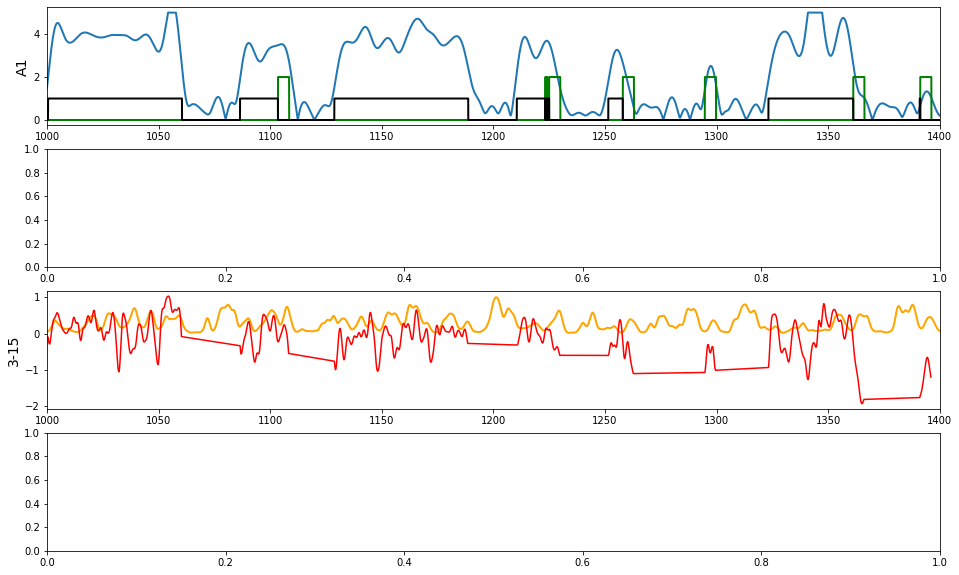

In [45]:
t_start, t_end = 1000, 1400  # in seconds

tl_idxs = np.where((tl[:, 0] > t_start) & (tl[:, 0] < t_end))[0]

fig, axes = plt.subplots(4, 1, figsize=(16, 10))

# spectrograms for A1, PPC
for i, area in enumerate(areas[:1]):
    #sgram_idxs = np.where((times > t_start) & (times < t_end))[0]
    #im = axes[i].pcolormesh(times[sgram_idxs], frequencies, specgram[:, sgram_idxs], shading='auto')
    #axes[i].plot(times[sgram_idxs], specgram[:, sgram_idxs].sum(axis=0)/30, color='white')
    #ax.plot(t_start + times, specgram[9]/5, color='orange')
    #axes[i].set_ylim(0, 10)
    
    factor = 3
    env = np.array(hilbert[area]['envelope'][::10])
    env[env > factor*env.std()] = factor*env.std()
    env_scaled = 5 * env/env.max()
    axes[0].plot(tl[tl_idxs][:, 0], env_scaled[tl_idxs], lw=2)
    axes[0].set_ylabel(area, fontsize=14)

    # events
    axes[i].plot(tl[tl_idxs][:, 0], tgt[tl_idxs], color='green', lw=2)  # target
    axes[i].plot(tl[tl_idxs][:, 0], bgr[tl_idxs], color='black', lw=2)  # background
    axes[i].set_xlim(t_start, t_end)

    
#env_scaled = np.array(hilbert[area]['envelope'][::10])

    
    
# # unit
axes[2].plot(tl[tl_idxs][:, 0], i_rate[tl_idxs]/i_rate[tl_idxs].max(), color='orange', lw=2)  # unit
axes[2].set_xlim(t_start, t_end)
axes[2].set_ylabel(unit_id, fontsize=14)
aeps_idxs = np.where((aeps_events[:, 0] > t_start) & (aeps_events[:, 0] < t_end))
axes[2].plot(aeps_events[aeps_idxs][:, 0], AEP_metrics_norm['A1']['N1'][aeps_idxs], color='red')

# speed
#ax.plot(tl_slice[:, 0], tl_slice[:, 3]*(-5), color='red', lw=2)  # speed

#fig.colorbar(im, label='Power Spectral Density (dB/Hz)')    
#fig.tight_layout()

In [82]:
pearsonr(env_A1[::10][:-10], i_rate)

(0.08515950881305112, 0.0)

In [159]:
bgr_aep_idxs = np.where(aeps_events[:, 1] == 1)[0]

metric1 = i_rate[aeps_tl_idxs][bgr_aep_idxs]
metric2 = AEP_metrics_norm['PPC']['P1'][bgr_aep_idxs]

pearsonr(metric1, metric2)

(0.1077891531350649, 1.5857728756071434e-15)